## Carregando os dados de um amigo em um dicionário

Netflix! 
O que começou como um serviço de aluguel de DVD em 1997 se tornou a maior empresa de entretenimento/mídia em valor de mercado, com mais de 200 milhões de assinantes em janeiro de 2021. 

Dado o grande número de filmes e séries na plataforma, foi uma ótima oportunidade para mostrar nossas habilidades de processamento de dados e nos envolvermos na indústria do entretenimento. Nosso amigo também estava aprimorando suas habilidades em Python e olhou para um arquivo CSV contendo dados do Netflix. Primeiro, eles estão fazendo algumas análises e acham que a duração média do filme está diminuindo.

Como prova disso, eles nos forneceram as seguintes informações. Para os anos de 2011 a 2020, as durações médias dos filmes são 103, 101, 99, 100, 100, 95, 95, 96, 93 e 90, respectivamente. Mas primeiro precisamos criar um DataFrame do zero. Vamos começar criando um objeto Python: um dicionário!

In [1]:
# criando as listas de anos e de durações
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

# criando um dicionário com as duas listas
movie_dict = {'years':years,'durations': durations}

# mostrando o dicionário
movie_dict

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}

## Criando um dataframe a partir de um dicionário 

Para converter nosso dicionario em um dataframe do pandas, nós vamos primeiro precisar importar a biblioteca como seu apelido comum. Também vamos verificar se nosso dataframe foi criado corretamente 

In [2]:
#importando pandas
import pandas as pd

#criando um dataframe com o dicionário e o pandas
durations_df = pd.DataFrame(movie_dict)

#mostrando o novo dataframe
durations_df

,years,durations
0,2011,103
1,2012,101
2,2013,99
3,2014,100
4,2015,100
5,2016,95
6,2017,95
7,2018,96
8,2019,93
9,2020,90


## Agora uma inspeção visual dos nossos dados

Agora precisamos seguir a afirmação do nosso amigo de que a duração dos filmes está diminuindo. Uma ótima maneira de começar os trabalhos é tendo uma vizualização. 
Como queremos explicar a duração dos filmes, no nosso eixo 'y' ficará as durações e no eixo 'x' as nossas datas. Respectivamente as nossas variáveis explicadas e explicativas. Para a vizualização em questão usaremos o matplotlib por comodidade e usualidade.

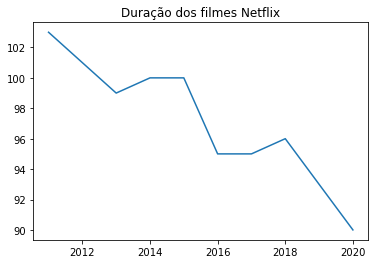

In [3]:
#importando a biblioteca de vizualição de gráficos (matplotlib)
import matplotlib.pyplot as plt

#criando os graficos com as variáveis descritas anteriomente
plt.plot(years,durations)
plt.title('Duração dos filmes Netflix')
plt.show()

## Carregando mais dados disponíveis em CSV

Aparentemente temos uma tendência de decaimento na duração dos filmes ao longo dos anos, porém esta é uma amostragem muito pequena para se tirar uma conclusão concreta. Carregaremos agora uma base de dados maior.
Há algumas perguntas sobre essa tendência que atualmente não podemos responder, incluindo:

Como é essa tendência por um longo período de tempo?
Isso é explicável por algo como o gênero de entretenimento?

Vamos começar analisando as cinco primeiras linhas para termos uma ideia de com que estamos lidando no nosso novo dataframe

In [4]:
#lendos os dados adicionais e criando um novo dataframe
netflix_df = pd.read_csv('datasets/netflix_data.csv')

#Obtendo uma visualização somente das cinco primeiras linhas
netflix_df[:5]

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


## A filtragem por filmes

Olhando o nosso novo dataframe notamos que na coluna 'type' também é apresentado programas de televisão. Notamos também que na coluna duração é apresentado valores em formatos divirgentes se tratando de programas de televisão.

Portanto precisamos agora filtrar todo o nosso dataframe para termos somente os filmes que é o objetivo de nossa análise. Além disso também não vamos precisar de todos os tipos de informação que foram apresentados, então vamos criar um novo dataframe somente com título, país, gênero, ano_lançamento e duração.



In [5]:
#criando um subset do dataframe com os filmes
netflix_df_movies_only = netflix_df[netflix_df['type'] == 'Movie']

#selecionando somente as variáveis de interesse
netflix_movies_col_subset = netflix_df_movies_only[['title', 'country', 'genre', 'release_year', 'duration']]

#Obtendo uma visualização somente das cinco primeiras linhas
netflix_movies_col_subset[:5]

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


## Criando uma nova visualização

Agora que já selecionamos os nossos dados de interesse vamos fazer uma nova vizualização para ter uma nova base de análise. Antes utilização um gráfico de visualização linear, mas agora ele não é mais efetivo e se torna necessario o gráfico de dispersão. Como já explicado antes vamos utilizar a duração no eixo 'y' e o ano de lançamento no eixo 'x'.

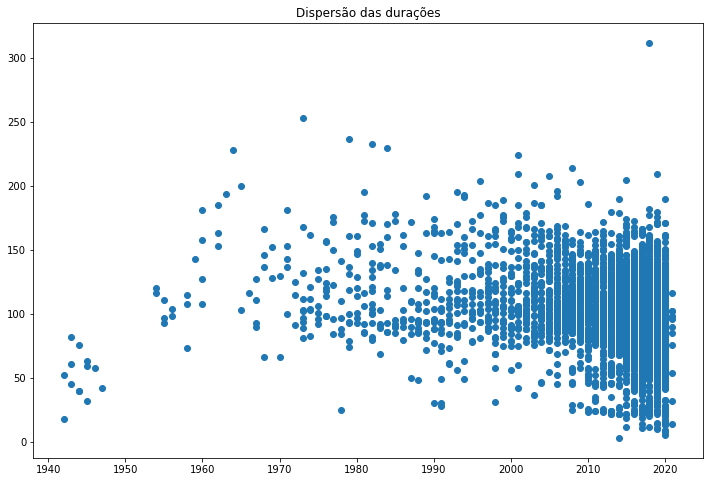

In [6]:
#criando as nossa variáveis
eixo_y = netflix_movies_col_subset['duration']
eixo_x = netflix_movies_col_subset['release_year']

#montando o nosso gráfico
fig = plt.figure(figsize=(12,8))
plt.scatter(eixo_x,eixo_y)
plt.title('Dispersão das durações')
plt.show()

## Indo mais a fundo

Este último gráfico é muito mais informativo do que aquele que montamos anteriormente. Podemos ver juntamente que a maioria dos filmes que estão disponiveis na plataforma foram lançados nas últimas duas décadas. 

Depois de uma olhada mais profunda podemos ver que muitos filmes tem 60 minutos ou menos! Agora vamos olhar os filmes com menos de 60 minutos e os respectivos gêneros. Isso pode nos dar um insight maior sobre o que está acontecendo.

In [7]:
#pegando somente os menores de 60min
short_movies = netflix_movies_col_subset[netflix_movies_col_subset['duration'] < 60]

#mostrando um pouco dos dados
short_movies[:20]

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
162,A Christmas Special: Miraculous: Tales of Lady...,France,Uncategorized,2016,22
171,A Family Reunion Christmas,United States,Uncategorized,2019,29
177,A Go! Go! Cory Carson Christmas,United States,Children,2020,22
178,A Go! Go! Cory Carson Halloween,NaN,Children,2020,22
179,A Go! Go! Cory Carson Summer Camp,NaN,Children,2020,21


## Markação dos filmes curtos

Parece que muitos filmes observados se enquadram nas categorias de Crianças, Stand-Up e Documentários. Vamos agora fazer uma demonstração diferente no nosso gráfico, dessa vez marcando os valores com cores diferentes.

Podemos escrever uma função loop para criar uma lista e passar ela para o nosso gráfico.

In [8]:
# Criando uma lista vazia
colors = []

# Interagindo com as colunas de netflix_movies_col_subset
for lab, row in netflix_movies_col_subset.iterrows() :
    if row['genre'] == 'Children' : 
        colors.append('red')
    elif row['genre'] == 'Documentaries' :
        colors.append('blue')
    elif row['genre'] == 'Stand-Up' :
        colors.append('green')
    else:
        colors.append('black')
        
# Inspecionando os dez primeiros valores na nossa lista
colors[:10]

['black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'blue']

## Colocando parâmetros especiais

Agora temos uma lista de cores que podemos passar para o nosso gráfico de dispersão, dando uma ajuda a indentificarmos no gráfico como se situa os dados.

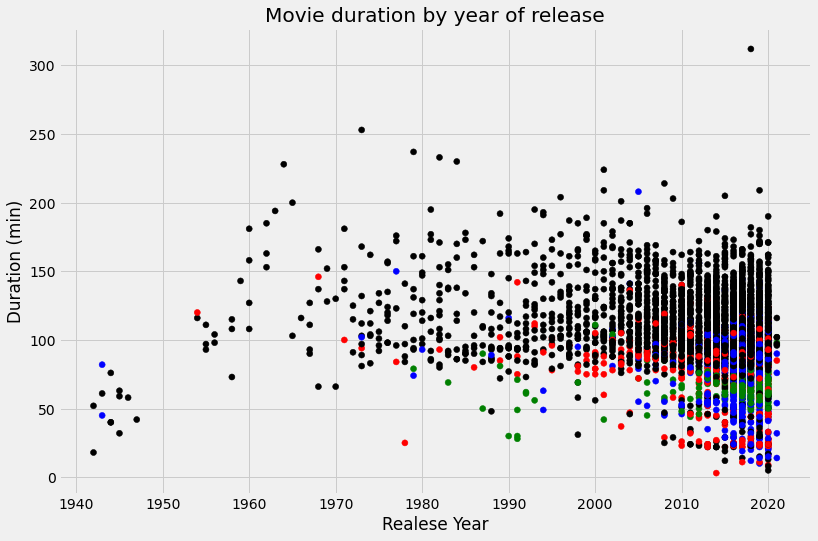

In [9]:
#parametros especiais para a vizualização
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

#criando a nossa dispersão usando os novos dados
eixo_y = netflix_movies_col_subset['duration']
eixo_x = netflix_movies_col_subset['release_year']
plt.scatter(eixo_x,eixo_y, c = colors)
plt.title('Movie duration by year of release')
plt.xlabel('Realese Year')
plt.ylabel('Duration (min)')
plt.show()

##  E agora?

Bem, como suspeitávamos, gêneros não típicos, como filmes infantis e documentários, estão agrupados na metade inferior da trama. Mas não podemos ter certeza até realizarmos análises adicionais.

In [10]:
# Agora temos certeza de que os filmes estão ficando menores?
are_movies_getting_shorter = 'maybe'